# Multi-class

In [3]:
# Load the dataset
import scipy.io
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torch
import torch.nn as nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms, models


train_images = scipy.io.loadmat('train_images.mat')
train_labels = scipy.io.loadmat('train_labels.mat')
test_images = scipy.io.loadmat('test_images.mat')
test_labels = scipy.io.loadmat('test_labels.mat')
print(train_images)
print(test_images )

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar  7 20:35:12 2018', '__version__': '1.0', '__globals__': [], 'train_images': array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)}
{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Mar  7 20:35:12 2018', '__version__': '1.0', '__globals__': [], 'test_images': array([[  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ..., 216, 149,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=int64)}


In [4]:
train_images
#train_labels
#type(data)
#train_images['train_images'].shape
#train_labels['train_labels'].shape
X_train = train_images['train_images']
y_train = train_labels['train_labels']
X_test = test_images['test_images']
y_test = test_labels['test_labels']
print("X_train  : ",X_train.shape)
print("X_train[0]  : ",X_train[0].shape)
print("y_train  : ",y_train.shape)
#print("y_train[0]  : ",y_train[0].shape)
print("X_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

X_train  :  (10000, 784)
X_train[0]  :  (784,)
y_train  :  (1, 10000)
X_test  :  (1000, 784)
y_test  :  (1, 1000)


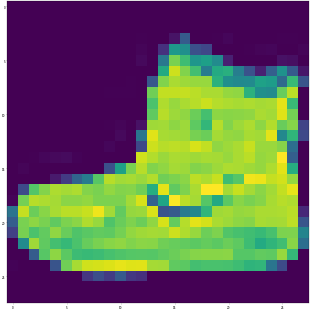

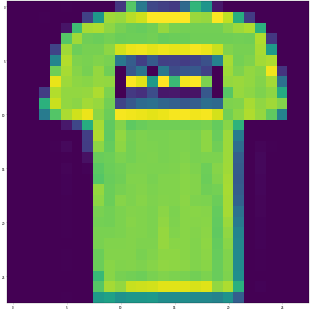

In [5]:
# Displayign the image
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(20,20), dpi=20)
plt.imshow(X_train[0].reshape(28,28), cmap="viridis")
plt.figure(figsize=(20,20), dpi=20)
plt.imshow(X_train[1].reshape(28,28), cmap="viridis")#gray , plasma
plt.show()

In [6]:
print("y_train tranposed shape:" ,y_train.transpose().shape)
y_train = y_train.transpose()
print("y_test tranposed shape:" ,y_test.transpose().shape)
y_test = y_test.transpose()

y_train tranposed shape: (10000, 1)
y_test tranposed shape: (1000, 1)


In [7]:
X_train = torch.tensor(X_train, dtype=torch.float)
y_train = torch.tensor(y_train, dtype=torch.long) 
X_test = torch.tensor(X_test, dtype=torch.float)
y_test = torch.tensor(y_test, dtype=torch.long) 

In [8]:
# check the unique label
np.unique(y_train.numpy())

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [9]:
y_train =y_train.view(-1,)
print("y_train shape: ",y_train.shape)
y_test=y_test.view(-1,)
print("y_test shape: ",y_test.shape)

y_train shape:  torch.Size([10000])
y_test shape:  torch.Size([1000])


In [10]:
class MyModule(nn.Module):
    def __init__(self, num_features,num_hidden,num_out=3):
        super(MyModule, self).__init__()
        self.input = nn.Linear(num_features, num_hidden)
        self.hidden =nn.Linear(num_hidden,num_out)
    def forward(self, x,):
        X = F.relu(self.input(x))      
        X = F.softmax(self.hidden(X), dim=-1)
        return X

In [11]:
import torch.nn.functional as F
class MyModule(torch.nn.Module):
    def __init__(self,l1,l2):
        super(MyModule, self).__init__()
        self.input = nn.Linear(784,l1)
        self.hidden1 = nn.Linear(l1,l2)
        self.hidden2 = nn.Linear(l2,10)
    def forward(self,x):
        X = F.relu(self.input(x))
        X = F.relu(self.hidden1(X))
        X =self.hidden2(X)
        return X

In [12]:
from sklearn.model_selection import GridSearchCV
import torch.nn.functional as F
from skorch import NeuralNetClassifier
net = NeuralNetClassifier(
        MyModule(l1=50, l2=10),
        max_epochs=30,
        lr=0.001,
        optimizer=torch.optim.Adam,
        criterion=torch.nn.CrossEntropyLoss,
        iterator_train__shuffle=True,
        )
params = {
    'module__l1': [50,75,100],#,500],
    'module__l2': [10,15,20],#100]
}
gs = GridSearchCV(net, params, refit=False, cv=5, scoring='accuracy')
gs.fit(X_train,y_train)
print(gs.best_score_, gs.best_params_)

C:\Users\ASUS\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


Re-initializing module because the following parameters were re-set: l1, l2.
Re-initializing module because the following parameters were re-set: l1, l2.
  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        2.5310       0.1013        2.3074  1.9576
      2        2.3066       0.1013        2.3062  0.4619
      3        2.3054       0.1013        2.3049  0.4762
      4        2.2976       0.1250        2.2773  0.4741
      5        2.1221       0.1944        1.9477  0.4625
      6        1.9164       0.1950        1.8980  0.5583
      7        1.8770       0.1969        1.8671  0.5289
      8        1.8529       0.2013        1.8476  0.4727
      9        1.8333       0.2031        1.8343  0.4630
     10        1.8177       0.2106        1.8161  0.4600
     11        1.8053       0.2075        1.8068  0.4664
     12        1.7927       0.2112        1.7944  0.5228
     13        1.7803       0.2294        1.7845

In [16]:
net = NeuralNetClassifier(
        MyModule(l1=50, l2=20),
        max_epochs=30,
        lr=0.001,
        optimizer=torch.optim.Adam,
        criterion=torch.nn.CrossEntropyLoss,
        iterator_train__shuffle=True,
        )

In [17]:
net.fit(X_train,y_train)

  epoch    train_loss    valid_acc    valid_loss     dur
-------  ------------  -----------  ------------  ------
      1        1.9651       0.5065        1.4072  0.3910
      2        1.2010       0.6825        1.1376  0.3590
      3        0.9166       0.7160        0.8362  0.3570
      4        0.6706       0.7655        0.6665  0.3550
      5        0.6089       0.7790        0.6176  0.3590
      6        0.5452       0.7745        0.6498  0.3535
      7        0.5328       0.7860        0.5889  0.3715
      8        0.5297       0.7980        0.5812  0.3450
      9        0.4799       0.7965        0.5929  0.3630
     10        0.4545       0.8050        0.5710  0.3480
     11        0.4311       0.7985        0.5869  0.3460
     12        0.4483       0.8035        0.5665  0.3615
     13        0.4445       0.7785        0.6365  0.3590
     14        0.4144       0.8010        0.5767  0.3520
     15        0.3821       0.8000        0.5721  0.3570
     16        0.3888       0.8

<class 'skorch.classifier.NeuralNetClassifier'>[initialized](
  module_=MyModule(
    (input): Linear(in_features=784, out_features=50, bias=True)
    (hidden1): Linear(in_features=50, out_features=20, bias=True)
    (hidden2): Linear(in_features=20, out_features=10, bias=True)
  ),
)

In [18]:
y_pred_test = net.predict(X_test)


X-axis is predicted label for test data and Y-axis is true label for test data



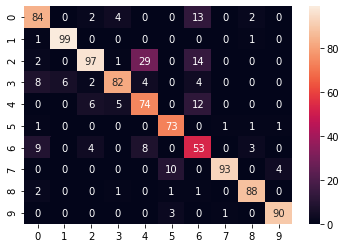

In [21]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
a = y_pred_test # predicted
b = y_test.numpy()   #real label
print("\nX-axis is predicted label for test data and Y-axis is true label for test data\n")
classes = np.array([str(i) for i in range(0,10)])
c = confusion_matrix(a,b)
sns.heatmap(c, annot=True, xticklabels=classes, yticklabels=classes);

In [22]:
from sklearn.metrics import accuracy_score
print("accuracy score: ", accuracy_score(y_test, y_pred_test))
from sklearn.metrics import classification_report

report = classification_report(y_true=y_test,y_pred=y_pred_test)
print(report)

accuracy score:  0.833
              precision    recall  f1-score   support

           0       0.80      0.79      0.79       107
           1       0.98      0.94      0.96       105
           2       0.68      0.87      0.76       111
           3       0.77      0.88      0.82        93
           4       0.76      0.64      0.70       115
           5       0.95      0.84      0.89        87
           6       0.69      0.55      0.61        97
           7       0.87      0.98      0.92        95
           8       0.95      0.93      0.94        95
           9       0.96      0.95      0.95        95

    accuracy                           0.83      1000
   macro avg       0.84      0.84      0.83      1000
weighted avg       0.84      0.83      0.83      1000

